In [ ]:
# Installing required versions of the tensorflows 

!pip install tensorflow-gpu==1.15.5
!pip uninstall scipy
!pip install scipy==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 411.0 MB 27 kB/s 
     |████████████████████████████████| 3.8 MB 48.0 MB/s 
     |████████████████████████████████| 503 kB 56.4 MB/s 
     |████████████████████████████████| 50 kB 7.5 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 2.9 MB 60.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=151b28436e3a7e713fa90618323bc0b0f2bff11e86454a0eed2d74943fd1b0b1
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninsta

Found existing installation: scipy 1.7.3
Uninstalling scipy-1.7.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scipy-1.7.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scipy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/scipy.libs/libopenblasp-r0-2d23e62b.3.17.so
    /usr/local/lib/python3.7/dist-packages/scipy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/scipy/*
Proceed (y/n)? y
  Successfully uninstalled scipy-1.7.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.6 MB 423 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.18.5 which is incompatible.
pymc 4.1.4 requires scipy>=1.4.1, but you have scipy 1.2.0 whic

In [ ]:
# Need Google drive access to download the code files and pretrained models
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Listing files
%ls '/content/gdrive/MyDrive'

 AmazonFashion6ImgPartitioned.npy  'Fashion_Image_Recommendations (1).zip'
'Colab Notebooks'/                 'Getting started.pdf'


In [ ]:

# Unzipping Code Files
!unzip '/content/gdrive/MyDrive/Fashion_Image_Recommendations (1).zip'

Archive:  /content/gdrive/MyDrive/Fashion_Image_Recommendations (1).zip
  inflating: checkpoint/AmazonFashion6ImgPartitioned.npy_16_64_64/checkpoint  
  inflating: checkpoint/AmazonFashion6ImgPartitioned.npy_16_64_64/DCGAN.model-311502.data-00000-of-00001  
  inflating: checkpoint/AmazonFashion6ImgPartitioned.npy_16_64_64/DCGAN.model-311502.index  
  inflating: checkpoint/AmazonFashion6ImgPartitioned.npy_16_64_64/DCGAN.model-311502.meta  
  inflating: gan_execution.py        
  inflating: gan_train.py            
  inflating: ops.py                  
  inflating: Untitled-1.coffee       
  inflating: utils.py                
  inflating: visual_recommender.py   
  inflating: Visual_Recommender_Evaluation_100.ckpt.data-00000-of-00001  
  inflating: Visual_Recommender_Evaluation_100.ckpt.index  
  inflating: Visual_Recommender_Evaluation_100.ckpt.meta  


In [ ]:
# Copying the dataset file from the google drive

!cp '/content/gdrive/My Drive/AmazonFashion6ImgPartitioned.npy' AmazonFashion6ImgPartitioned.npy

In [ ]:
#Unmounting the files as we have copied all the rquired files

drive.flush_and_unmount()

In [ ]:
#Importing Necessary Tensorflow module to execute the model and image generations.

import tensorflow as tf
from tensorflow.nn import l2_loss as loss_function
from tensorflow.keras.initializers import glorot_normal
from tensorflow.train import AdamOptimizer as optim_fn
from tensorflow.train import Saver

print(tf.version)

<module 'tensorflow._api.v1.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow_core/_api/v1/version/__init__.py'>


In [ ]:
# Setting the latent dimensionality (dimensions of the features extracted by the CNN)
dims = 100

In [ ]:
# Pre trained Model path for the Visual Recommender Algorithm, we will have the weights, bias, and user latent vectors which were trained in visual_recommender.py

Visual_Recommender_ckpt_path = 'Visual_Recommender_Evaluation_100.ckpt'

In [ ]:
# Loading the dataset, We can see how the datset is designed in the untitled file.

import numpy as np

[train_data, val_data, test_data, Item, user_num, item_num] = np.load('AmazonFashion6ImgPartitioned.npy', allow_pickle=True, encoding='bytes')

In [ ]:
# test data structure
test_data[44636]

[{'reviewerID': 'A2O01MO9OAMNG7',
  'asin': 'B009PNSN3Y',
  'reviewerName': 'Sakura95996',
  'helpful': [0, 0],
  'reviewText': "it is as expected, the print is just like the picture, and material is quiet good. I bought this for my little brother(about 5'4, broad shoulders, chest size about 35&#34;), just beware that even thought it's M it's quiet big for size M (in my opinion). However, the measurements were exactly as describe on the website, it was wrong on my part to buy a bigger size for my brother than his actual measurement. The measurement here indicates chest size as 42&#34;, and it was definitely too big for my little brother. &#62;&#60; Hopefully he'll grow into it. XD It's a good shirt for the price though. It came after 2 wks, as expected since it's from overseas.",
  'overall': 5.0,
  'summary': 'as expected',
  'unixReviewTime': 1357862400,
  'reviewTime': '01 11, 2013',
  b'productid': 164874}]

In [ ]:
# The data astructure of the Item, we have category 'c' image of the Item in 'imgs'
Item[164874]

{b'asin': b'B009PNSN3Y',
 b'c': array([ True, False, False, False, False, False]),
 b'title': b'Men Spring Tree Pattern Design Round Neck Shirt',
 b'price': 10.95,
 b'imUrl': b'http://ecx.images-amazon.com/images/I/41xs%2Bu46xgL._SX342_.jpg',
 b'related': {b'also_viewed': [b'B007WA1UEG',
   b'B00A8YYHRK',
   b'B00E6RDJQ0',
   b'B00A8ZF7WI']},
 b'imgs': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc0\x00\x11\x08\x01V\x01V\x03\x01"\x00\x0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


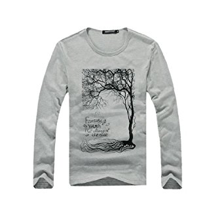

In [ ]:
# Just restructuring the Stringified image, open stringified image which is in the form of bytes, resize them to 224,224 and RGB in color 
from six import BytesIO
from PIL import Image
import scipy

scipy.misc.toimage(np.array(Image.open(BytesIO((Item[164874][b'imgs']))).convert('RGB').resize((224,224)),dtype=np.float64))

In [ ]:
#Necessary functions to output the neural network layers for building the CNN

def add_conv_2d_layer(inp_layer, wt_layer, stride):
  return tf.nn.conv2d(inp_layer, wt_layer, [1, stride, stride, 1], padding = 'SAME')

def add_bias_layer(inp_layer, bias_layer):
  return tf.nn.bias_add(inp_layer, bias_layer)

def add_relu(inp_layer):
  return tf.nn.relu(inp_layer)

def add_dropout(inp_layer, dropout):
  return tf.nn.dropout(inp_layer, 0.5)

def add_maxpool_2d_layer(inp_layer):
  return tf.nn.max_pool(inp_layer, [1,2,2,1], [1,2,2,1], padding = 'SAME')

def initialize_wt_layer(variable, shape):
  return tf.compat.v1.get_variable(variable, dtype=tf.float32, shape = shape, initializer=glorot_normal())

def initialize_bias_layer(variable, shape):
  return tf.compat.v1.get_variable(variable, dtype=tf.float32, initializer=tf.zeros([shape]))

def placeholder(dtype, shape):
  return tf.compat.v1.placeholder(dtype=dtype, shape=shape, name=None)

In [ ]:
from os import waitid_result
## Weights and Bias Initializations

# For Hidden CNN Layer 1
wtcnn1 = initialize_wt_layer('wc1', [11, 11, 3, 64])
bcnn1 = initialize_bias_layer('bc1', 64)

# For Hidden CNN Layer 2
wtcnn2 = initialize_wt_layer('wc2', [5, 5, 64, 256])
bcnn2 = initialize_bias_layer('bc2', 256)

# For Hidden CNN Layer 3
wtcnn3 = initialize_wt_layer('wc3', [3, 3, 256, 256])
bcnn3 = initialize_bias_layer('bc3', 256)

# For Hidden CNN Layer 4
wtcnn4 = initialize_wt_layer('wc4', [3, 3, 256, 256])
bcnn4 = initialize_bias_layer('bc4', 256)

# For Hidden CNN Layer 5
wtcnn5 = initialize_wt_layer('wc5', [3, 3, 256, 256])
bcnn5 = initialize_bias_layer('bc5', 256)

# For Fully Connected Dense Layer 1
wtdl1 = initialize_wt_layer('wd1', [7*7*256, 4096])
bdl1 = initialize_bias_layer('bd1', 4096)

# For Fully Connected Dense Layer 2
wtdl2 = initialize_wt_layer('wd2', [4096, 4096])
bdl2 = initialize_bias_layer('bd2', 4096)

# For Fully Connected Dense Layer 3
wtdl3 = initialize_wt_layer('wd3', [4096, dims])
bdl3 = initialize_bias_layer('bd3', dims)

In [ ]:
# Building the CNN Model, with above initialized weight and bias vectors


def CNN_Model(input):
  input = (tf.cast(input, tf.float32) - 127.5)/127.5
  # Input layer reshaping to account for all 3 RGB layers and flattening.
  input = tf.reshape(input, shape = [-1, 224, 224, 3])

  # Layer grouping architecture : Conv2d -> bias -> relu -> maxpool
  # We have removed Max pool in two hiddenlayers to account for image blurring as max pool blurs the image much more.

  # Layer 1  
  cnnl1 = add_conv_2d_layer(input, wtcnn1, 4)
  cnnl1 = add_bias_layer(cnnl1, bcnn1)
  cnnl1 = add_relu(cnnl1)
  cnnl1 = add_maxpool_2d_layer(cnnl1)

  # Layer 2
  cnnl2 = add_conv_2d_layer(cnnl1, wtcnn2, 1)
  cnnl2 = add_bias_layer(cnnl2, bcnn2)
  cnnl2 = add_relu(cnnl2)
  cnnl2 = add_maxpool_2d_layer(cnnl2)

  # Layer 3
  cnnl3 = add_conv_2d_layer(cnnl2, wtcnn3, 1)
  cnnl3 = add_bias_layer(cnnl3, bcnn3)
  cnnl3 = add_relu(cnnl3)

  # Layer 4
  cnnl4 = add_conv_2d_layer(cnnl3, wtcnn4, 1)
  cnnl4 = add_bias_layer(cnnl4, bcnn4)
  cnnl4 = add_relu(cnnl4)

  #Layer 5
  cnnl5 = add_conv_2d_layer(cnnl4, wtcnn5, 1)
  cnnl5 = add_bias_layer(cnnl5, bcnn5)
  cnnl5 = add_relu(cnnl5)
  cnnl5 = add_maxpool_2d_layer(cnnl5)

  # Fully Connected Layer 1 
  dl1 = tf.reshape(cnnl5, [-1, 7*7*256])
  dl1 = tf.add(tf.matmul(dl1, wtdl1), bdl1)
  dl1 = add_relu(dl1)
  dl1 = add_dropout(dl1, 1.0)

  # Fully Connected Layer 2
  dl2 = tf.add(tf.matmul(dl1, wtdl2), bdl2)
  dl2 = add_relu(dl2)
  dl2 = add_dropout(dl2, 1.0)

  # Fully Connected Layer 3 == Output layer == Dimensions [4096,100]
  opl = tf.add(tf.matmul(dl2, wtdl3), bdl3)
  
  return opl

In [ ]:
# from io import StringIO
# def loadimg(item):
#     return np.round(np.array(Image.open(StringIO(Item[item]['imgs'])).convert('RGB').resize((224,224)),dtype=np.float64))

In [ ]:
imgtst = placeholder(tf.uint8, [128,224,224,3]) 
_imgtst = (tf.cast(imgtst, tf.float32) - 127.5)/127.5

dropout_prob = placeholder(tf.float32, None) 

with tf.variable_scope("DVBPR") as scope:
  optest = CNN_Model(_imgtst)
  # THIS IS THE USER LATENT VECTOR, has dimansions of [(no. of users),100] --> represents the preference/latent vector of each user (hence (user_num * dims ))
  reg_const = tf.Variable(tf.random_uniform([user_num,dims],minval=0,maxval=1)/100)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
# Define tensorflow sessions, and configurations.
from tensorflow import Session, ConfigProto

session = Session(config = ConfigProto(allow_soft_placement=True, log_device_placement=False))
session.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [ ]:
# We shall now restore the pretrained weights and bias vectors form the checkpoint files generated from visual_recommender.py after training.

save_model = Saver([k for k in tf.global_variables() if k.name.startswith('DVBPR')])

save_model.restore(session,Visual_Recommender_ckpt_path)


In [ ]:
# Importing the DCGAN model from 

from gan_train import DCGAN

dcgan = DCGAN(
          session,
          input_width=64,
          input_height=64,
          output_width=64,
          output_height=64,
          batch_size=16,
          sample_num=16,
          y_dim=6,
          dataset_name='AmazonFashion6ImgPartitioned.npy',
          input_fname_pattern='*.jpg',
          crop='False',
          checkpoint_dir='/content/checkpoint',
          sample_dir='/content')

dcgan.load('/content/checkpoint')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.






 [*] Reading checkpoints... /content/checkpoint
 [*] Success to read DCGAN.model-311502


(True, 311502)

In [ ]:
z=tf.Variable(np.random.normal(0,0.5,size=[16,256]),name='input_noise',dtype=tf.float32)
y=placeholder(dtype=tf.float32,shape=[16,6])
# Initializing the GAN's generator with random inputs y = category vector and z = Noise vector.
gan_image=dcgan.get_gen(z, y)
# Initializing GAN's discriminator to classify gan_image.
_, gan_rf=dcgan.get_dis(gan_image, y)

# Resizing the images so that we can interlink the training of GAN Image and the CNN  
image=tf.image.resize_nearest_neighbor(images=gan_image, size=[224,224], align_corners=None, name=None)

with tf.variable_scope("DVBPR") as scope:
    scope.reuse_variables()
    # Classifying using the visual recommender the output of GAN.
    result = CNN_Model(image)

In [ ]:
# random_user place holder, which is used for the recommendation geneartion, recommendations for this user
random_user=placeholder(dtype=tf.int32,shape=[1])

with tf.variable_scope('opt'):
    # Here we shall calculate the loss value between the features extracted from real image and image from GAN
    obj=tf.reduce_mean(tf.matmul(result,tf.transpose(tf.gather(reg_const,random_user))))-tf.reduce_mean(tf.square(gan_rf-1))
    optimizer = optim_fn(learning_rate=0.05).minimize(-obj,var_list=[z])
    idx =tf.reduce_sum(tf.matmul(result,tf.transpose(tf.gather(reg_const,random_user))),1)

session.run(tf.variables_initializer([k for k in tf.global_variables() if k.name.startswith('opt')]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
import scipy

# Recommendations start here. Recommendations will use the categories as well, we have 6 categories as represented in Imgs[<item_num>] 'c'.
# Looping over each category
for categories in range(6):
    print(categories)
    
    while True: 
        # Some random user to generate recommendations. 
        usernum=np.random.randint(user_num)

        # We shall generate recommendations only for user which have more that 15 interactions, and also the test data has the item of that selected categories.
        if len(train_data[usernum])>15 and Item[test_data[usernum][0][b'productid']][b'c'][categories]==1:
          print(usernum)
          break
        
    
    #Initializing the categories vector to be sent as input for GAN
    input_for_gan=np.zeros([16,6])
    it = 0
    # putting '1' indicating that is the category which needs recommendations to be generated.
    while (it<16):
      input_for_gan[it,categories] = 1
      it = it + 1

    session.run(z.assign(np.random.normal(0,0.5,size=[16,256])))
    
    generated_images=[]
    # Initializing the GAN Image and the user latent vector of that random_user 
    img,_=session.run([gan_image,idx],feed_dict={dcgan.is_train:False,y:input_for_gan,random_user:[usernum]})
    generated_images.append(img)
    
    for i in range(10):
      # Optimizing the GAN Image and the user latent vector of that random_user, So we have recommendations according to users preference/latent features vector 
      imp,_ = session.run([idx,optimizer],feed_dict={dcgan.is_train:False,y:input_for_gan,random_user:[usernum]})
      img=session.run(gan_image,feed_dict={dcgan.is_train:False,y:input_for_gan,random_user:[usernum]})
      generated_images.append(img)
    
    # Appending the generated images to the jpg files by concatenating.
    for i in range(16):
        output_image = np.zeros([64,64,3])
        for j in range(11):
            output_image=np.concatenate([output_image,np.float64(np.round(generated_images[j][i]*127.5+127.5))],axis=1)
        if i==0: _output_image=output_image
        else: _output_image=np.concatenate([_output_image,output_image],axis=0)
    scipy.misc.toimage(_output_image,cmin=0.0).save('gan_generated_recommendation_'+str(categories)+'.jpg')

0
23459


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


1
34917
2
27391
3
99
4
32416
5
5756
